# UK Traffic Accidents Severity Classification
4IZ565 – Programming for Data Science in Python

Spring Semester 2023/2024 Coursework

Authors: Terka Lukešová, Jan Štipl

## Dataset Description
The dataset contains statistics on traffic accidents in the UK, including many attributes, such as the route category and hazards, the vehicles involved, and some information about the drivers. Our goal will be to predict the target attribute Accident Severity, whose values are Slight/Serious/Fatal.

Dataset source: https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles

## Exploratory Data Analysis

### Initial settings

In [322]:
import random
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sklearn.set_config(transform_output="pandas")

RANDOM_STATE = 42  # used throughout the notebook to make the results reproducible
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

### Load CSV tables and merge them 

In [323]:
# For speed during testing load only small percentage of the data
p = 0.005  # 0.5% of the lines
skip_rows = lambda i: i > 0 and random.random() > p
# skip_rows = None

accidents_df = pd.read_csv("./data/Accident_Information.csv",
                           skiprows=skip_rows)
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 3169: invalid start byte
vehicle_df = pd.read_csv("./data/Vehicle_Information.csv", encoding="latin1")

/tmp/ipykernel_813345/452454692.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents_df = pd.read_csv("./data/Accident_Information.csv",


In [324]:
df = pd.merge(accidents_df, vehicle_df, on="Accident_Index", how="inner")
del vehicle_df
del accidents_df

### Overview

In [ ]:
df

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_x,InScotland,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
0,200501BS70110,B,450,Unclassified,0.000,Slight,NaN,2005-03-31,Thursday,1.000,Give way or uncontrolled,T or staggered junction,51.519,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524200.000,181580.000,-0.211,E01002909,1,2,0.000,0.000,Metropolitan Police,Dry,Single carriageway,NaN,30,23:39,Urban,Fine no high winds,2005,No,16 - 20,1.000,Urban area,1.000,1598.000,NaN,NaN,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,MINI,MINI ONE AUTO,Petrol,Male,NaN,No tow/articulation,Did not leave carriageway,0.000,Going ahead other,2,Car,No,Front,2005
1,200501BS70296,A,315,A,4.000,Slight,NaN,2005-06-15,Wednesday,1.000,Auto traffic signal,More than 4 arms (not roundabout),51.502,Daylight,Westminster,Westminster,527760.000,179700.000,-0.161,E01004689,1,2,0.000,0.000,Metropolitan Police,Wet or damp,Dual carriageway,NaN,30,10:30,Urban,Raining no high winds,2005,No,56 - 65,3.000,Urban area,7.000,582.000,NaN,NaN,Other/Not known (2005-10),Approaching junction or waiting/parked at junc...,HONDA,FJS 600,Petrol,Female,NaN,No tow/articulation,Did not leave carriageway,0.000,Going ahead other,1,Motorcycle over 500cc,No,Offside,2005
2,200501BS70296,A,315,A,4.000,Slight,NaN,2005-06-15,Wednesday,1.000,Auto traffic signal,More than 4 arms (not roundabout),51.502,Daylight,Westminster,Westminster,527760.000,179700.000,-0.161,E01004689,1,2,0.000,0.000,Metropolitan Police,Wet or damp,Dual carriageway,NaN,30,10:30,Urban,Raining no high winds,2005,No,26 - 35,2.000,Urban area,4.000,1998.000,NaN,NaN,Other/Not known (2005-10),Approaching junction or waiting/parked at junc...,MERCEDES,C200 KOMP.CLASSIC AUTO,Petrol,Female,NaN,No tow/articulation,Did not leave carriageway,0.000,Changing lane to left,2,Car,No,Nearside,2005
3,200501BS70378,A,3220,A,3220.000,Slight,NaN,2005-07-12,Tuesday,2.000,Auto traffic signal,Crossroads,51.482,Daylight,Kensington and Chelsea,Kensington and Chelsea,526930.000,177490.000,-0.173,E01002840,1,2,0.000,0.000,Metropolitan Police,Dry,Single carriageway,NaN,30,08:05,Urban,Fine no high winds,2005,No,26 - 35,NaN,Urban area,2.000,NaN,NaN,NaN,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,HONDA,CG 125-4,NaN,Male,NaN,No tow/articulation,Did not leave carriageway,0.000,Going ahead other,1,Car,No,Front,2005
4,200501BS70378,A,3220,A,3220.000,Slight,NaN,2005-07-12,Tuesday,2.000,Auto traffic signal,Crossroads,51.482,Daylight,Kensington and Chelsea,Kensington and Chelsea,526930.000,177490.000,-0.173,E01002840,1,2,0.000,0.000,Metropolitan Police,Dry,Single carriageway,NaN,30,08:05,Urban,Fine no high winds,2005,No,Data missing or out of range,NaN,Data missing or out of range,NaN,1870.000,NaN,NaN,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,VAUXHALL,VIVARO 2700 DTI SWB,Heavy oil,Male,NaN,No tow/articulation,Did not leave carriageway,0.000,Turning right,2,Van / Goods 3.5 tonnes mgw or under,No,Nearside,20

In [ ]:
df.dtypes

Accident_Index                                  object
1st_Road_Class                                  object
1st_Road_Number                                float64
2nd_Road_Class                                  object
2nd_Road_Number                                float64
Accident_Severity                               object
Carriageway_Hazards                             object
Date                                            object
Day_of_Week                                     object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                                object
Junction_Detail                                 object
Latitude                                       float64
Light_Conditions                                object
Local_Authority_(District)                      object
Local_Authority_(Highway)                       object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude 

In [ ]:
df.select_dtypes(include=['object']).nunique() # Count unique values in each non-numerical column

<<<<<<< local <removed>


Accident_Index                 6953
1st_Road_Class                    6
2nd_Road_Class                    6
Accident_Severity                 3
Carriageway_Hazards               6
Date                           3452
Day_of_Week                       7
Junction_Control                  6
Junction_Detail                   9
Light_Conditions                  5
Local_Authority_(District)      411
Local_Authority_(Highway)       205
LSOA_of_Accident_Location      5384
Police_Force                     51
Road_Surface_Conditions           6
Road_Type                         6
Special_Conditions_at_Site        8
Time                           1129
Urban_or_Rural_Area               2
Weather_Conditions               10
InScotland                        2
Age_Band_of_Driver               11
Driver_Home_Area_Type             4
Hit_Object_in_Carriageway        12
Hit_Object_off_Carriageway       12
Journey_Purpose_of_Driver         8
Junction_Location                10
make                        

>>>>>>> remote <modified: text/plain>


In [ ]:
df['Carriageway_Hazards'].unique()

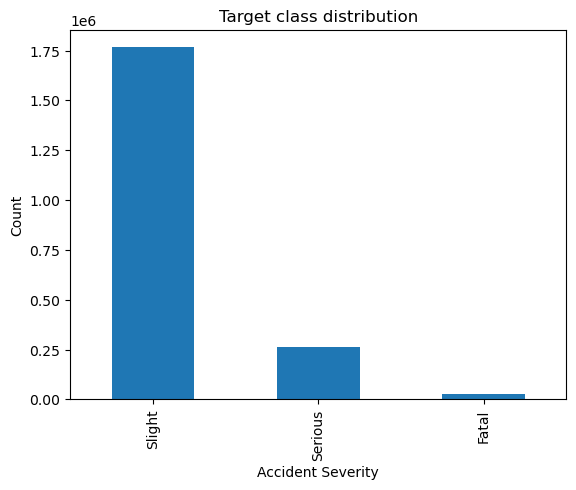

In [4]:
target_variable = 'Accident_Severity'
df[target_variable].value_counts().plot.bar()
plt.title('Target class distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

<Axes: title={'center': 'Number_of_Casualties'}, xlabel='Accident_Severity'>

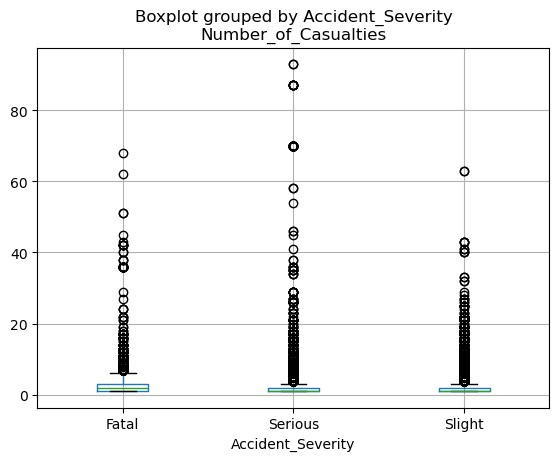

In [5]:
df.boxplot('Number_of_Casualties', by=target_variable)

<Axes: title={'center': 'Number_of_Vehicles'}, xlabel='Accident_Severity'>

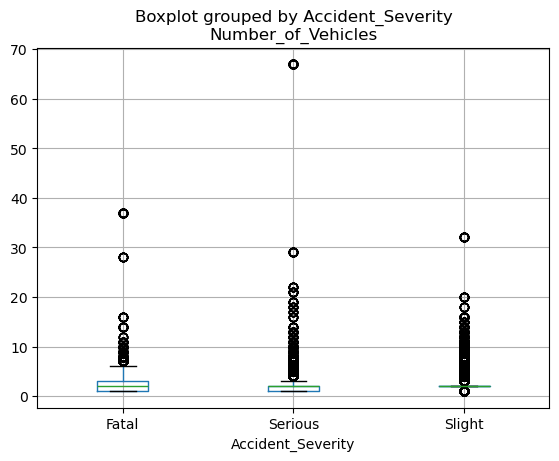

In [7]:
df.boxplot('Number_of_Vehicles', by=target_variable)

In [8]:
df.loc[df['Number_of_Casualties'] > 80]

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_x,InScotland,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
882171,201106X047581,Motorway,62.000,NaN,0.000,Serious,None,2011-06-20,Monday,1.000,Data missing or out of range,Not at junction or within 20 metres,53.476,Daylight,Salford,Salford,373615.000,397818.000,-2.399,E01005732,87,5,0.000,0.000,Greater Manchester,Dry,Dual carriageway,None,70.000,15:10,Rural,Fine no high winds,2011,No,26 - 35,13.000,Data missing or out of range,NaN,1160.000,None,None,Journey as part of work,Not at or within 20 metres of junction,EOS,NaN,Heavy oil,Male,Skidded,No tow/articulation,Did not leave carriageway,0.000,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Front,2011
882172,201106X047581,Motorway,62.000,NaN,0.000,Serious,None,2011-06-20,Monday,1.000,Data missing or out of range,Not at junction or within 20 metres,53.476,Daylight,Salford,Salford,373615.000,397818.000,-2.399,E01005732,87,5,0.000,0.000,Greater Manchester,Dry,Dual carriageway,None,70.000,15:10,Rural,Fine no high winds,2011,No,56 - 65,6.000,Urban area,7.000,7300.000,None,None,Journey as part of work,Not at or within 20 metres of junction,VOLVO,NaN,Heavy oil,Male,Skidded,No tow/articulation,Did not leave carriageway,0.000,Slowing or stopping,2,Bus or coach (17 or more pass seats),No,Front,2011
882173,201106X047581,Motorway,62.000,NaN,0.000,Serious,None,2011-06-20,Monday,1.000,Data missing or out of range,Not at junction or within 20 metres,53.476,Daylight,Salford,Salford,373615.000,397818.000,-2.399,E01005732,87,5,0.000,0.000,Greater Manchester,Dry,Dual carriageway,None,70.000,15:10,Rural,Fine no high winds,2011,No,46 - 55,6.000,Urban area,1.000,1998.000,None,None,Journey as part of work,Not at or within 20 metres of junction,FORD,TRANSIT 280 SWB,Heavy oil,Male,Skidded,No tow/articulation,Did not leave carriageway,0.000,Slowing or stopping,3,Van / Goods 3.5 tonnes mgw or under,No,Front,2011
882174,201106X047581,Motorway,62.000,NaN,0.000,Serious,None,2011-06-20,Monday,1.000,Data missing or out of range,Not at junction or within 20 metres,53.476,Daylight,Salford,Salford,373615.000,397818.000,-2.399,E01005732,87,5,0.000,0.000,Greater Manchester,Dry,Dual carriageway,None,70.000,15:10,Rural,Fine no high winds,2011,No,56 - 65,5.000,Urban area,1.000,2463.000,None,None,Journey as part of work,Not at or within 20 metres of junction,VAUXHALL,MOVANO 3500 CDTI MWB,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.000,Slowing or stopping,4,Van / Goods 3.5 tonnes mgw or under,No,Back,2011
882175,201106X047581,Motorway,62.000,NaN,0.000,Serious,None,2011-06-20,Monday,1.000,Data missing or out of range,Not at junction or within 20 metres,53.476,Daylight,Salford,Salford,373615.000,397818.000,-2.399,E01005732,87,5,0.000,0.000,Greater Manchester,Dry,Dual carriageway,None,70.000,15:10,Rural,Fine no high winds,2011,No,36 - 45,3.000,Urban area,9.000,2198.000,None,None,Journey as part of work,Not at or within 20 metres of junction,FORD,TRANSIT 110 T300S FWD,Heavy oil,Male,N

### Problems
* Unclassified and NaN in the same columns -> we have to merge
* Categorical values and not one-hot encoded
* The classes are very imbalanced

## Data preprocessing

### Separate the target class from attributes

In [ ]:
X, y = df.loc[:, df.columns != target_variable], df[target_variable]
del df

The plot shows that we have to deal with imbalanced classes.

### Consolidate string values Unknown/Unclassified to NaN

In [ ]:
X.replace(
    [
        "Not known",
        "Data missing or out of range",
        "Unclassified"
    ],
    np.nan, inplace=True)
X.fillna(np.nan, inplace=True)

<<<<<<< local <removed>


C:\Users\admin\AppData\Local\Temp\ipykernel_5268\2424004044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(
C:\Users\admin\AppData\Local\Temp\ipykernel_5268\2424004044.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(np.nan, inplace=True)


>>>>>>> remote <modified: >


### Train-test split
Our train-test ratio is 80:20. We make use of stratification because the target classes are imbalanced.

In [ ]:
from sklearn.model_selection import train_test_split

# stratifying preserves the proportion of how data is distributed in the target 
# same proportion of distribution in the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=RANDOM_STATE)
del X
del y

In [ ]:
y_train.value_counts().plot.bar()
plt.title('Target class distribution (train data)')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

y_test.value_counts().plot.bar()
plt.title('Target class distribution (test data)')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

### Drop columns with too many missing values
The columns are identified on the train set, the drop is then applied to the test set too

In [ ]:
# Get percentage of NaN values for each column
na_percentage = X_train.isna().mean() * 100
na_percentage.sort_values(ascending=False, inplace=True)
na_percentage

Carriageway_Hazards                           98.411
Special_Conditions_at_Site                    97.763
Hit_Object_in_Carriageway                     96.015
Hit_Object_off_Carriageway                    91.126
Skidding_and_Overturning                      87.764
2nd_Road_Class                                80.284
Journey_Purpose_of_Driver                     41.205
Junction_Control                              36.463
Driver_IMD_Decile                             34.580
1st_Road_Class                                26.415
Age_of_Vehicle                                16.722
Driver_Home_Area_Type                         14.815
model                                         14.693
Engine_Capacity_.CC.                          12.089
Propulsion_Code                               11.270
Age_Band_of_Driver                             8.349
LSOA_of_Accident_Location                      7.138
make                                           5.097
Sex_of_Driver                                 

In [ ]:
to_drop = na_percentage[na_percentage > 40]
to_drop

Carriageway_Hazards          98.411
Special_Conditions_at_Site   97.763
Hit_Object_in_Carriageway    96.015
Hit_Object_off_Carriageway   91.126
Skidding_and_Overturning     87.764
2nd_Road_Class               80.284
Journey_Purpose_of_Driver    41.205
dtype: float64

In [ ]:
X_train.drop(columns=to_drop.index, inplace=True)
X_test.drop(columns=to_drop.index, inplace=True)

### Transformers

In [ ]:
# Extract month from date
month_extractor = lambda x: pd.to_datetime(x['Date'], format='%Y-%m-%d').dt.month
X_train['month'] = month_extractor(X_train)
X_test['month'] = month_extractor(X_test)

# Extract hour from time
hour_extractor = lambda x: pd.to_datetime(x['Time'], format='%H:%M').dt.hour
X_train['hour'] = month_extractor(X_train)
X_test['hour'] = month_extractor(X_test)

In [ ]:
numerical_variables = [
    # 'Number_of_Casualties', # Leaks info about accident severity
    # 'Number_of_Vehicles', # Leaks info about accident severity
    'Speed_limit',
    'Age_of_Vehicle',
    'Engine_Capacity_.CC.',
]

nominal_variables = [
    'Day_of_Week',
    'month',
    'hour',
    # 'Carriageway_Hazards',  Too many missing values
    'Junction_Detail',
    'Pedestrian_Crossing-Human_Control',
    'Pedestrian_Crossing-Physical_Facilities',
    'Road_Type',
    # 'Special_Conditions_at_Site', Too many missing values
    'Urban_or_Rural_Area',
    'Weather_Conditions',
    'Driver_Home_Area_Type',
    # 'Hit_Object_in_Carriageway', Too many missing values
    # 'Hit_Object_off_Carriageway', Too many missing values
    'Junction_Location',
    'make',
    'Propulsion_Code',
    'Sex_of_Driver',
    # 'Skidding_and_Overturning', Too many missing values
    'Towing_and_Articulation',
    'Vehicle_Leaving_Carriageway',
    'Vehicle_Location.Restricted_Lane',
    'Vehicle_Manoeuvre',
    'Vehicle_Type',
    'Was_Vehicle_Left_Hand_Drive',
    'X1st_Point_of_Impact',
]

# Order of the values can be determined lexicographically
ordinal_variables_auto = [
    'Age_Band_of_Driver',
    'Driver_IMD_Decile',
]

In [ ]:
# Correct order must be set manually
ordinal_variables_manual = [
    '1st_Road_Class',
    'Junction_Control',
    'Light_Conditions',
    'Road_Surface_Conditions',
]

road_class_categories = ['Motorway', 'A(M)', 'A', 'B', 'C']

junction_control_categories = [
    'Not at junction or within 20 metres',
    'Authorised person',
    'Auto traffic signal',
    'Stop sign',
    'Give way or uncontrolled',
]

light_conditions_categories = [
    'Daylight',
    'Darkness - lights lit',
    'Darkness - lighting unknown',
    'Darkness - lights unlit',
    'Darkness - no lighting',
]

road_surface_conditions_categories = [
    'Dry',
    'Wet or damp',
    'Snow',
    'Frost or ice',
    'Flood over 3cm. deep',
]

manual_categories = [
    road_class_categories,
    junction_control_categories,
    light_conditions_categories,
    road_surface_conditions_categories,
]

In [ ]:
X_train.filter(nominal_variables + ordinal_variables_auto + ordinal_variables_manual).nunique()

<<<<<<< local <removed>


Day_of_Week                                  7
month                                       12
hour                                        12
Junction_Detail                              9
Pedestrian_Crossing-Human_Control            3
Pedestrian_Crossing-Physical_Facilities      6
Road_Type                                    6
Urban_or_Rural_Area                          2
Weather_Conditions                           9
Driver_Home_Area_Type                        3
Junction_Location                            9
make                                       152
Propulsion_Code                              8
Sex_of_Driver                                2
Towing_and_Articulation                      6
Vehicle_Leaving_Carriageway                  9
Vehicle_Location.Restricted_Lane            10
Vehicle_Manoeuvre                           18
Vehicle_Type                                16
Was_Vehicle_Left_Hand_Drive                  2
X1st_Point_of_Impact                         5
Age_Band_of_D

>>>>>>> remote <modified: text/plain>


In [ ]:
from sklearn.compose import ColumnTransformer  # applies transformers to columns
from sklearn.pipeline import Pipeline  # assemble several steps
from sklearn.impute import SimpleImputer  # replace missing values using a descriptive statistic (e.g. mean, median,...)
from sklearn.preprocessing import OrdinalEncoder  # encode categorical features as an integer array
from sklearn.preprocessing import OneHotEncoder  # encode categorical features as a one-hot numeric array
from sklearn.preprocessing import \
    StandardScaler  # standardize features by removing the mean and scaling to unit variance

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)),
])

ord_pipe_auto = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder()),
])

ord_pipe_manual = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=manual_categories)),
])

transformers_list = [
    ('numerical', num_pipe, numerical_variables),
    ('nominal', cat_pipe, nominal_variables),
    ('ordinal_auto', ord_pipe_auto, ordinal_variables_auto),
    ('ordinal_manual', ord_pipe_manual, ordinal_variables_manual),
]

column_transformer = ColumnTransformer(transformers_list,
                                       remainder='drop',
                                       n_jobs=-1,
# If True, ColumnTransformer.get_feature_names_out will prefix all feature names with the name of the transformer that generated that feature.
                                       verbose_feature_names_out=False,
                                       verbose=True)

#X_train_transformed = column_transformer.fit_transform(X_train)
#X_test_transformed = column_transformer.transform(X_test)

#del X_train
#del X_test

<<<<<<< local <removed>


C:\Users\admin\coding\.venv_general\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


>>>>>>> remote <modified: >


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
label_encoder.classes_

## Modeling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')
feature_selection = RFE(estimator=decision_tree, n_features_to_select=50, step=1)

### Dummy Classifiers

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf_stratified = DummyClassifier(strategy='stratified', random_state=RANDOM_STATE)
dummy_clf_stratified.fit(X_train, y_train)

In [ ]:
dummy_clf_mostfrequent = DummyClassifier(strategy='most_frequent')
dummy_clf_mostfrequent.fit(X_train, y_train)

### Logistic Regression

In [ ]:
param_grid_regression = {
    'clf__C': (0.01, 0.1, 1, 10, 100, 1000),
    'clf__solver': ('lbfgs', 'sag', 'saga'),
}

classification_pipeline_regression = Pipeline([
    ('select', feature_selection),
    ('clf', LogisticRegression(penalty='l2', max_iter=1000, multi_class='multinomial', class_weight='balanced',
                               random_state=RANDOM_STATE))
])

search_acc_regression = GridSearchCV(estimator=classification_pipeline_regression, param_grid=param_grid_regression,
                                     cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

# search_acc_regression.fit(X_train_transformed, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('select',
                                        RFE(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                             random_state=42),
                                            n_features_to_select=50)),
                                       ('clf',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           multi_class='multinomial',
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__C': (0.01, 0.1, 1, 10, 100, 1000),
                         'clf__solver': ('lbfgs', 'sag', 'saga')},
             scoring='accuracy', verbose=2)

In [342]:
# search_acc_regression.best_estimator_

Pipeline(steps=[('select',
                 RFE(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                      random_state=42),
                     n_features_to_select=50)),
                ('clf',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=1000, multi_class='multinomial',
                                    random_state=42))])

### Random Forest

In [ ]:
param_grid_forest = {
    'clf__criterion' : ('gini', 'entropy'),
    'clf__n_estimators': (100, 500),
    'clf__max_depth': (1, 4),
    'clf__max_features': ('sqrt', 'log2'),
    'clf__min_samples_leaf': (1, 4),
    'clf__min_samples_split': (2, 5),
}

classification_pipeline_forest = Pipeline([
    ('prep', column_transformer),
    ('clf', RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced')),
], memory='.')

search_f1_forest = GridSearchCV(
    estimator=classification_pipeline_forest,
    param_grid=param_grid_forest,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

search_f1_forest.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('select',
                                        RFE(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                             random_state=42),
                                            n_features_to_select=50)),
                                       ('clf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__criterion': ('gini', 'entropy'),
                         'clf__max_depth': (1, 4, 7, 10),
                         'clf__min_samples_leaf': (1, 4, 7, 10)},
             scoring='accuracy', verbose=2)

In [ ]:
best_estimator = search_acc_forest.best_estimator_
best_estimator

Pipeline(steps=[('select',
                 RFE(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                      random_state=42),
                     n_features_to_select=50)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        random_state=42))])

In [ ]:
search_acc_forest.best_score_

In [ ]:
data = list(zip(best_estimator.feature_names_in_, best_estimator.feature_importances_))
imp_score_sel = pd.DataFrame(data, columns=['predictor', 'importance']).sort_values(by='importance', ascending=False)
imp_score_sel[20::-1].plot.barh(x='predictor', y='importance')
plt.title('Feature importance')
plt.show()

## Results and Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import ConfusionMatrixDisplay

def print_report(ytrue, ypred):
    print(f'Accuracy: {accuracy_score(ytrue, ypred):.3f}')
    print(f'Balanced accuracy: {balanced_accuracy_score(ytrue, ypred):.3f}')
    print(classification_report(ytrue, ypred, zero_division=np.nan, target_names=label_encoder.classes_))

def plot_confusion_matrices(ytrue, ypred):
    ConfusionMatrixDisplay.from_predictions(ytrue, ypred, display_labels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.show()

    ConfusionMatrixDisplay.from_predictions(ytrue, ypred, normalize='true', display_labels=label_encoder.classes_)
    plt.title('Confusion Matrix (normalized)')
    plt.show()

def plot_pr_curves(ytrue, ypred, yproba):
    fig, axs = plt.subplots(1, len(label_encoder.classes_), figsize=(18, 5), sharey=True)
    fig.suptitle('Precision-Recall Curves')
    for i, cls in enumerate(label_encoder.classes_):
        y_test_i = y_test == i
        baseline = y_test_i.mean()
        axs[i].plot([0, 1], [baseline, baseline], linestyle='--')
        
        precision, recall, _ = precision_recall_curve(y_test_i, yproba[:,i])
        auc_score = auc(recall, precision)
        axs[i].plot(recall, precision)
        
        axs[i].set_title(f'{cls} (AUC = {auc_score:.2f})')
        axs[i].set_xlabel('Recall')
        axs[i].set_ylabel('Precision')

### Stratified Dummy Classifiers

In [ ]:
y_pred_dummy_stratified = dummy_clf_stratified.predict(X_test)
y_proba_dummy_stratified = dummy_clf_stratified.predict_proba(X_test)

print_report(y_test, y_pred_dummy_stratified)

### Most Frequent Dummy Classifier

In [ ]:
y_pred_dummy_mostfrequent = dummy_clf_mostfrequent.predict(X_test)
y_proba_dummy_mostfrequent = dummy_clf_mostfrequent.predict_proba(X_test)

print_report(y_test, y_pred_dummy_mostfrequent)

### Logistic Regression

In [ ]:
search_acc_regression.best_score_

0.5679374389051809

Ellipsis

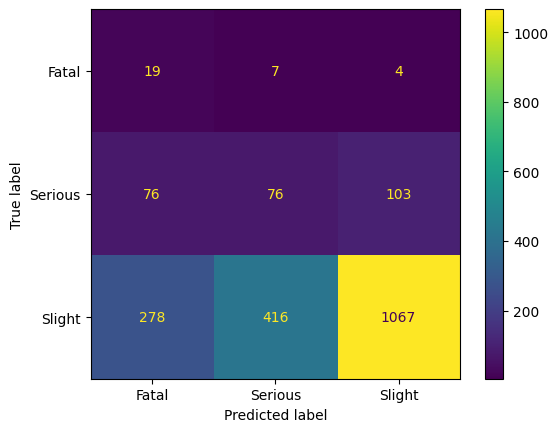

In [347]:
from sklearn import metrics

y_pred_regression = search_acc_regression.predict(X_test_transformed)
cnf_matrix_regression = metrics.confusion_matrix(y_test, y_pred_regression,
                                                 labels=search_acc_regression.classes_)
display = metrics.ConfusionMatrixDisplay(cnf_matrix_regression,
                                         display_labels=label_encoder.classes_)
display.plot()
...

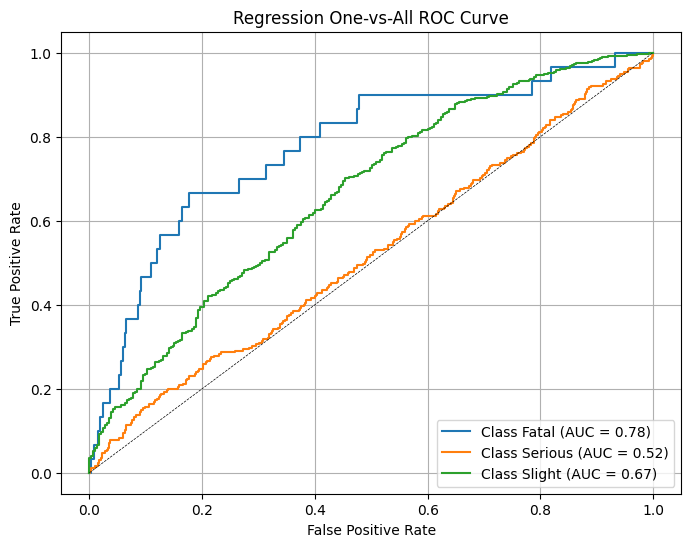

In [348]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


def show_ova_roc(estimator, X_test, y_test, classes: list, name: str):
    """
    Computes "One-vs-All" (OvA) ROC curve
    
    ROC curve is constructed for each class separately by
    treating that class as the positive class and the rest as the negative class. 
    This results in multiple ROC curves, one for each class.
    :param estimator: 
    :param X_test: 
    :param y_test: 
    :param classes: 
    :param name: 
    :return: 
    """
    
    # Compute class probabilities for the test set
    y_proba = estimator.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(estimator.classes_)):
        fpr[i], tpr[i], _ = roc_curve((y_test == estimator.classes_[i]).astype(int), y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(estimator.classes_)):
        plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', linewidth=0.5)  # Plot the diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} One-vs-All ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


show_ova_roc(search_acc_regression, X_test_transformed, y_test, label_encoder.classes_, "Regression")

### Random Forest

In [ ]:
y_pred_forest = search_f1_forest.predict(X_test)
y_proba_forest = search_f1_forest.predict_proba(X_test)

print_report(y_test, y_pred_forest)
plot_confusion_matrices(y_test, y_pred_forest)
plot_pr_curves(y_test, y_pred_forest, y_proba_forest)

In [23]:
search_acc_forest.best_score_

0.8551445369916708

In [24]:
search_acc_forest.score(X_test_transformed, y_test)

0.8673469387755102

Ellipsis

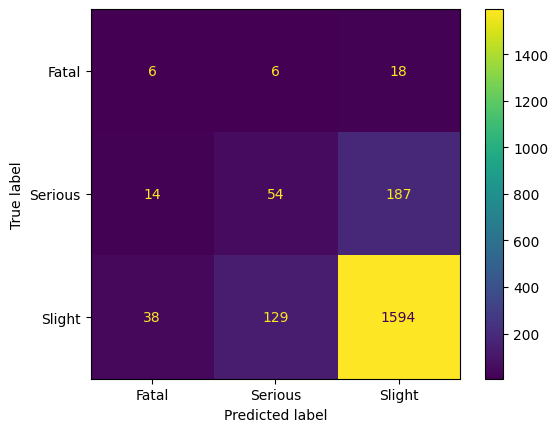

In [351]:
y_pred_forest = search_acc_forest.predict(X_test_transformed)
cnf_matrix_regression = metrics.confusion_matrix(y_test, y_pred_forest,
                                                 labels=search_acc_forest.classes_)
display = metrics.ConfusionMatrixDisplay(cnf_matrix_regression,
                                         display_labels=label_encoder.classes_)
display.plot()
...

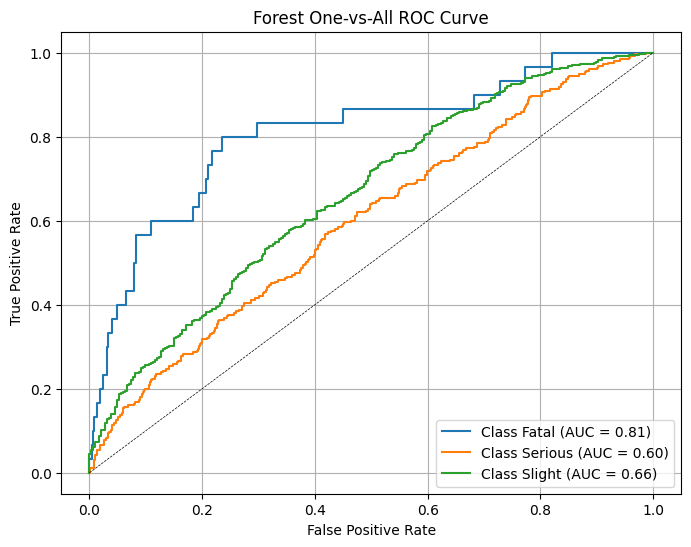

In [352]:
show_ova_roc(search_acc_forest, X_test_transformed, y_test, label_encoder.classes_, "Forest")

### Conclusion
In this course work we worked with UK Traffic Accidents data.
Our aim was to classify incident severity.

The source dataset is very large. In order to keep computation time on reasonable levels we randomly loaded 0.5% of the dataset.
We split the data to training and testing dataset in proportion 80:20.

We preprocessed the data by:
* merging dataset with accident information and dataset witch vehicle information
* removing variations of expressing missing values in the dataset 
* removing columns where more than 40% values were missing
* creating new column with extracted hour in day from time of the accident
* creating new column with extracted day in year from date of the accident
* using pipeline to handle missing values, encode and scale variables 

Then we built modeling pipeline for Logistic Regression and RandomForest.
The the pipeline consists of:
* Feature selection with Recursive Feature Elimination based on decision tree
* Hyper-parameter tuning and cross-validation using GridSearchCV   
* Training the model

We evaluated the models on their accuracy score and visualised trained model properties using:
*  Confusion Matrix
*  One-vs-All" (OvA) ROC curve

Overall RandomForest had great accuracy of ~0.86.
Logistic Regression model had poor accuracy of ~0.45.
We conclude that the poor performance was caused by the problem complexity and partly by not equal distribution of the target class in the training and test data.  
 